<a href="https://colab.research.google.com/github/CJ-mess/ML-test-udemy/blob/main/time_series_gaps_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

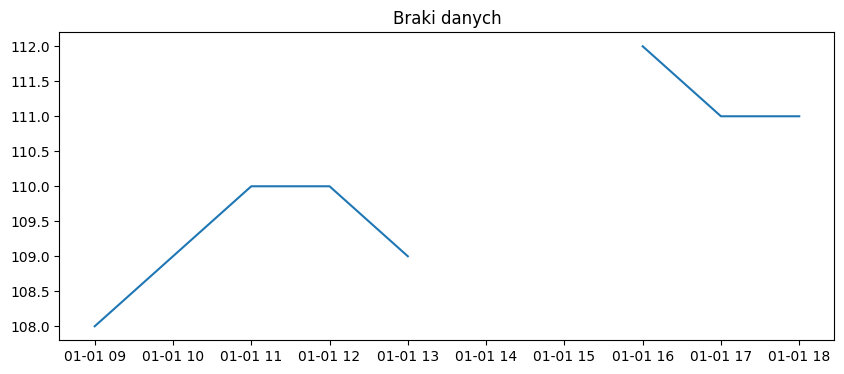

In [5]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

# wstepne przygotowanie danych wraz z brakami

# reczne wygenerowanie danych testowych z brakami
data =  {"price": [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
# wygenerowanie czasu wraz z podzialem na 10 czesci. Podzial generuje sie po godzinach
date_range = pd.date_range(start="01-01-2020 09:00", end="01-01-2020 18:00", periods=10)
df = pd.DataFrame(data=data, index=date_range)

register_matplotlib_converters()
sns.set
plt.figure(figsize=(10, 4))
#  tytul wykresu
plt.title("Braki danych")
# MATLIB - generowanie wykresu na podstawie danych z data frame
pp = plt.plot(df.price)

# PLOTLY - generowanie wykresu na podstawie danych z data frame (BIBLOTEKA ALTERNATYWA, JEDNA Z WIELU)
df_plotly = df.reset_index()
px.line(df_plotly, "index", "price", width=600, height=400, title="Braki danych")



In [13]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^
# sposoby usuniecia brakow:
# dropna(), fillna(), mean(), interpolate(), 'ffill', 'Bfill'
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^

# reczne wygenerowanie danych testowych z brakami
data =  {"price": [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
# wygenerowanie czasu wraz z podzialem na 10 czesci. Podzial generuje sie po godzinach
date_range = pd.date_range(start="01-01-2020 09:00", end="01-01-2020 18:00", periods=10)
df = pd.DataFrame(data=data, index=date_range)

df_plotly = df.reset_index()
# usuniecie brakow danych na twardo i scalenie pozostalych
df_plotly = df_plotly.dropna()
px.line(df_plotly, "index", "price", width=600, height=400, title="Braki danych - usun")

df_plotly = df.reset_index()
# wstawienie stalej wartosci w miejsce brakow -  w tym przypadku zero
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, "index", "price_fill", width=600, height=400, title="Braki danych - zero")

df_plotly = df.reset_index()
# wstawienie stalej wartosci w miejsce brakow -  w tym przypadku srednia
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, "index", "price_fill", width=600, height=400, title="Braki danych - srednia")

df_plotly = df.reset_index()
# wstawienie stalej wartosci w miejsce brakow -  w tym przypadku interpolacja
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, "index", "price_fill", width=600, height=400, title="Braki danych - interpolacja")

df_plotly = df.reset_index()
# wstawienie stalej wartosci w miejsce brakow -  w tym przypadku forward fill - w miejsce braku wstaw wartosci, ktore byly ostatnie PRZED brakiem
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, "index", "price_fill", width=600, height=400, title="Braki danych - ostatnie dane PRZED")

df_plotly = df.reset_index()
# wstawienie stalej wartosci w miejsce brakow -  w tym przypadku backward fill - w miejsce braku wstaw wartosci, ktore byly ostatnie PO brakU
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, "index", "price_fill", width=600, height=400, title="Braki danych - ostatnie dane PO")
